In [184]:
# importing  necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [185]:
emp = pd.read_csv('/content/Employee (4).csv')

In [186]:
emp

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [187]:
emp1 = emp.copy()
emp1

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [188]:
emp1.shape

(74498, 24)

In [189]:
emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [190]:
emp1.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [191]:
# gives the count of unique values in the variables
emp1.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In [192]:
emp1.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

<Axes: >

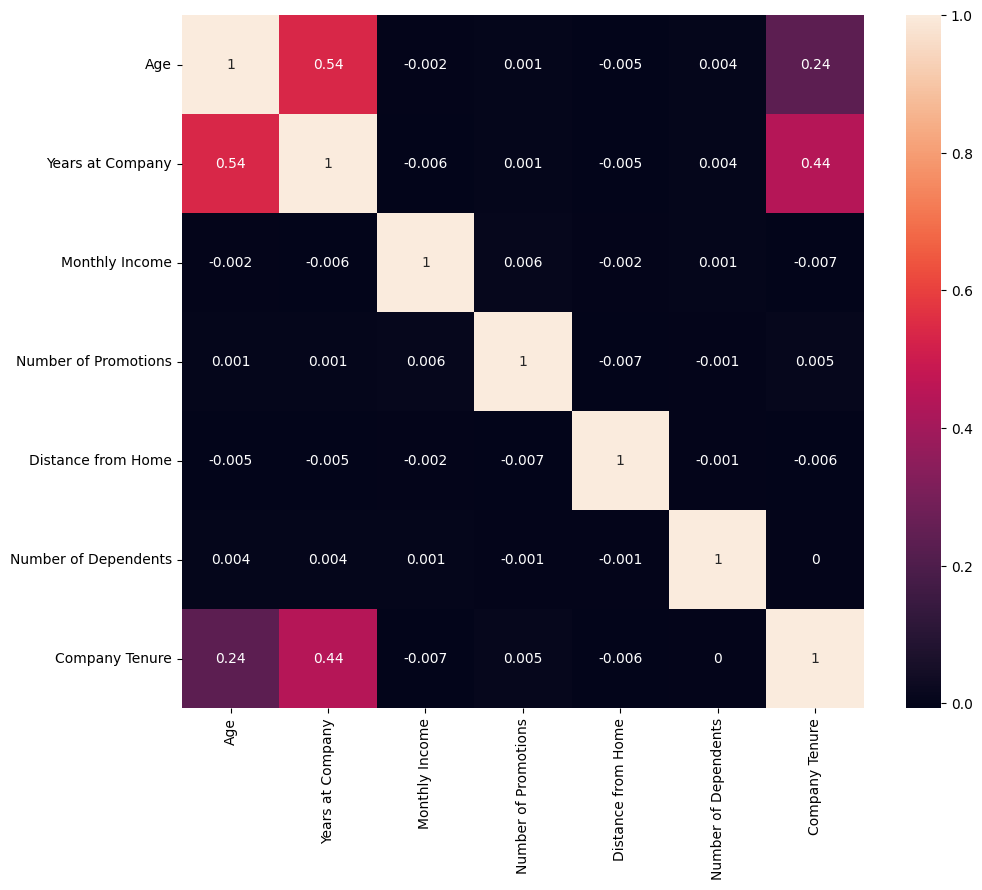

In [193]:
# Bivariate Analysis
# Correlation heatmap for numerical features
plt.figure(figsize=(11, 9))
emp2=emp1.drop(columns='Employee ID')
emp3 =round(emp2.corr(numeric_only=True),3)
sns.heatmap(emp3, fmt='.2g', annot=True)

In [194]:
#CustomerID
emp1["Employee ID"].nunique()

74498

In [195]:
emp1['Age'].nunique()

42

In [196]:
emp1['Age'].value_counts().reset_index()

,Age,count
0,34,1875
1,40,1861
2,53,1843
3,45,1842
4,38,1834
5,55,1824
6,43,1822
7,30,1818
8,39,1813
9,35,1806


In [197]:
emp1['Age'].describe()

count    74498.000000
mean        38.529746
std         12.083456
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64

In [198]:
emp1.groupby('Attrition')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Left,35370.0,37.884111,12.245562,18.0,27.0,38.0,48.0,59.0
Stayed,39128.0,39.113371,11.905088,18.0,29.0,39.0,49.0,59.0


<ipython-input-199-b392b4e846b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Age', x='Attrition', data=emp1, palette='plasma')


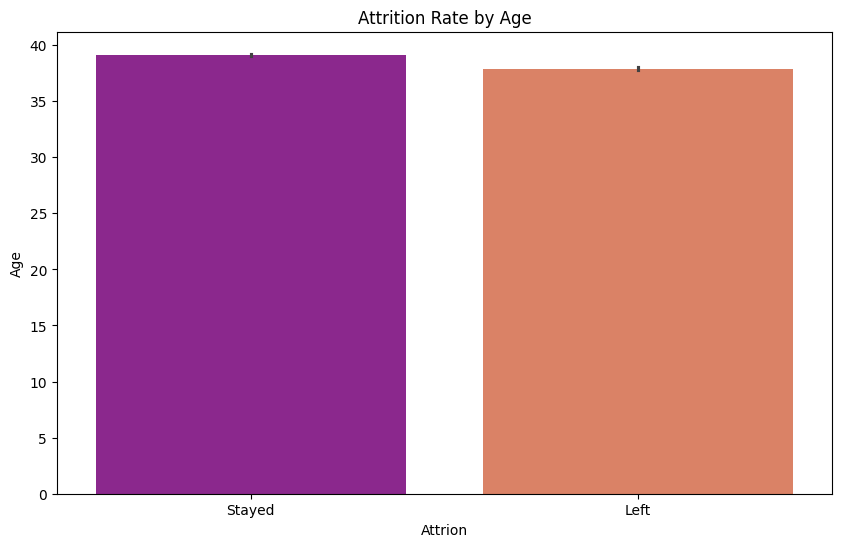

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Attrition', data=emp1, palette='plasma')
plt.title('Attrition Rate by Age')
plt.xlabel('Attrion')
plt.ylabel('Age')
plt.show()

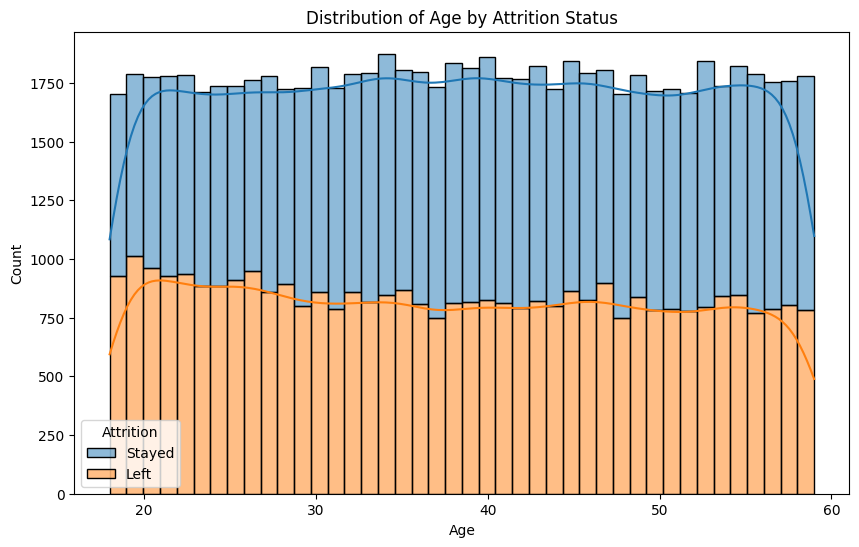

In [200]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(emp1, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Age by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

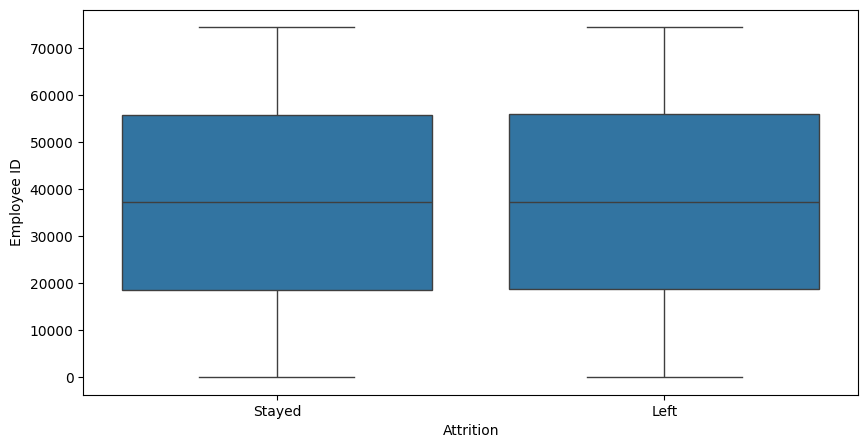

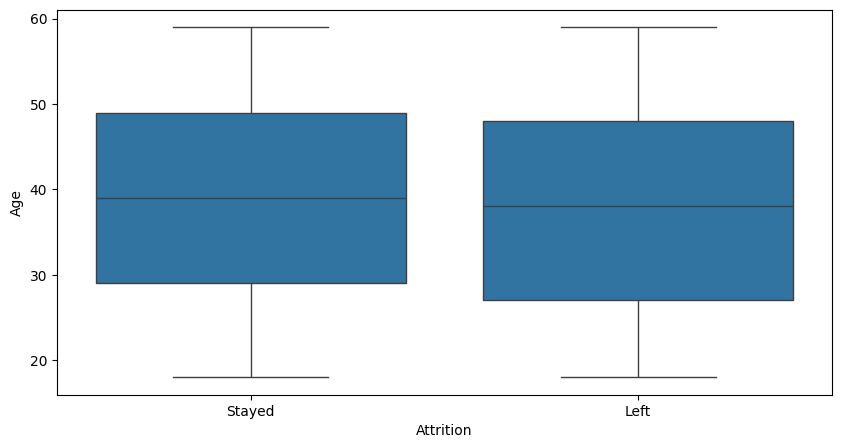

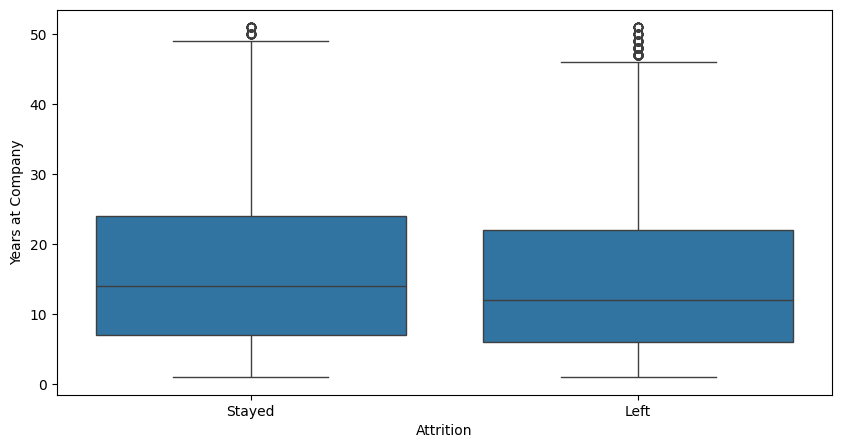

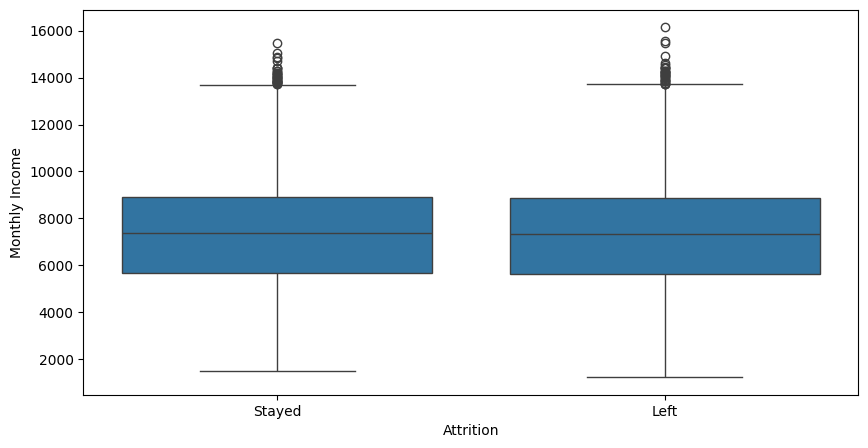

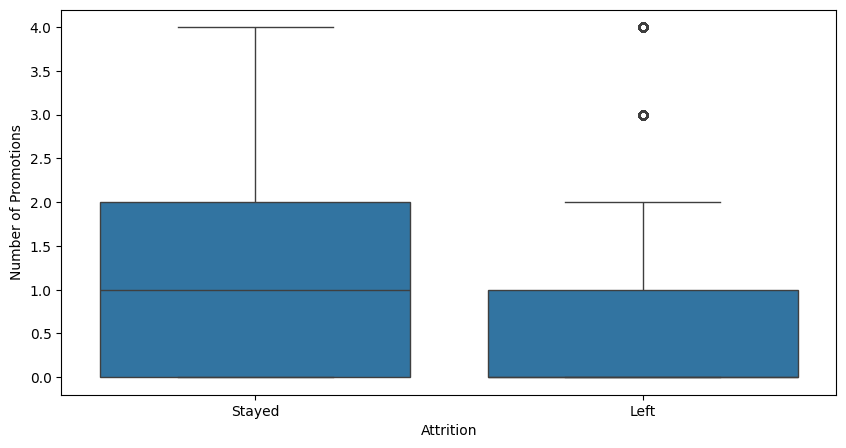

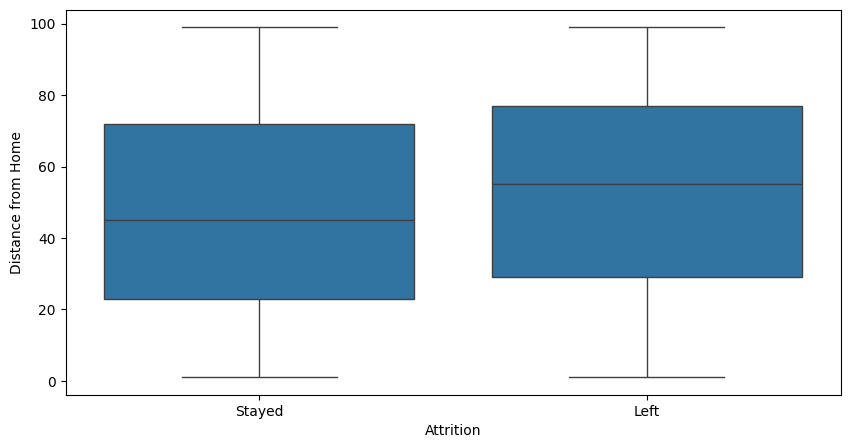

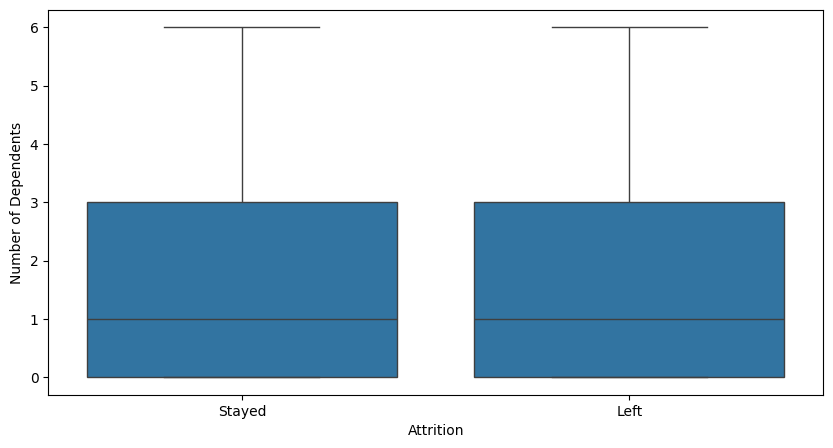

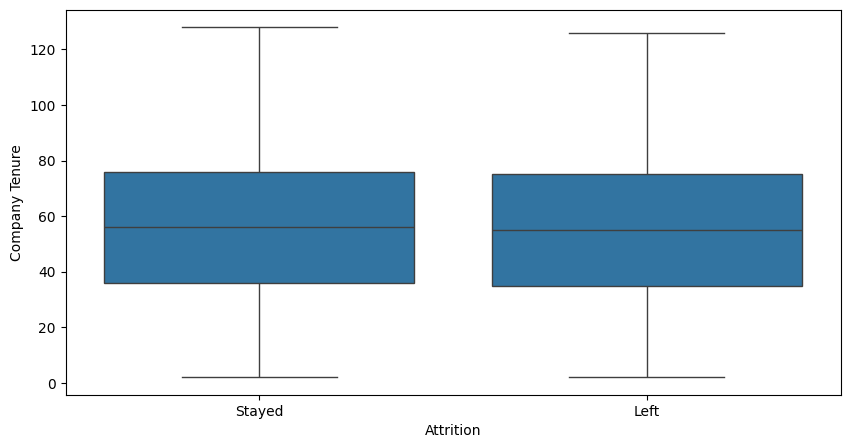

In [201]:
# Box plots for numerical features vs attrition
numerical_columns = emp1.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Attrition', y=column, data=emp1)
    plt.show()

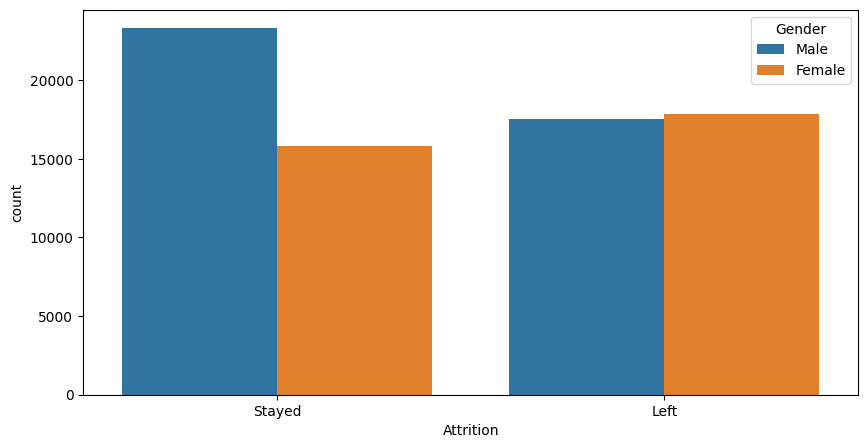

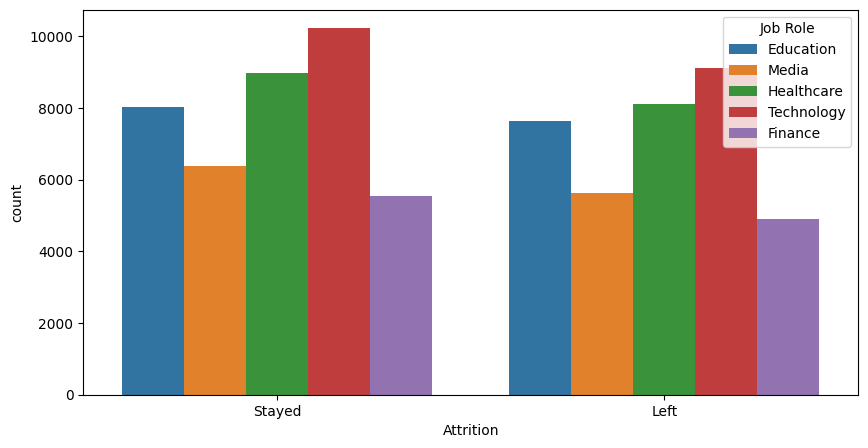

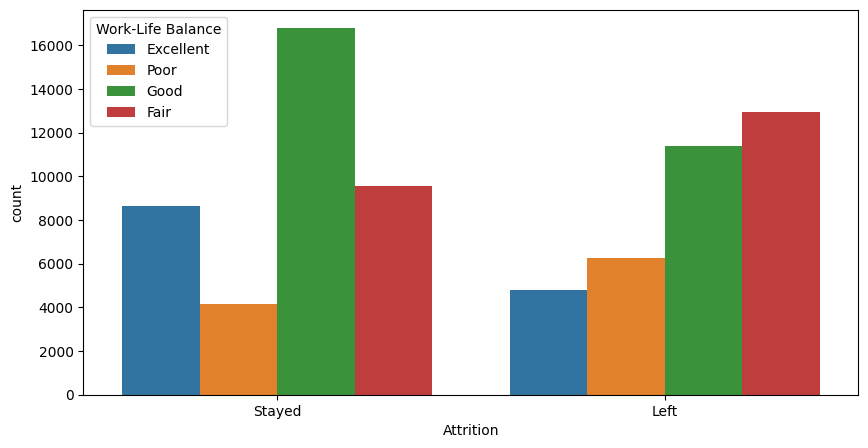

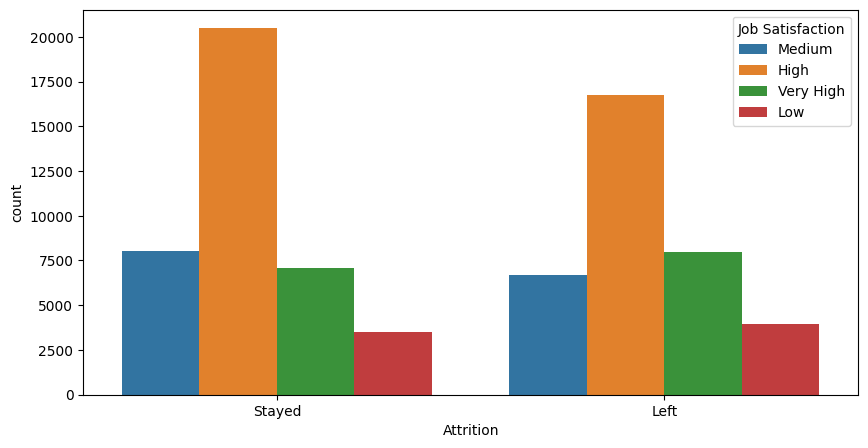

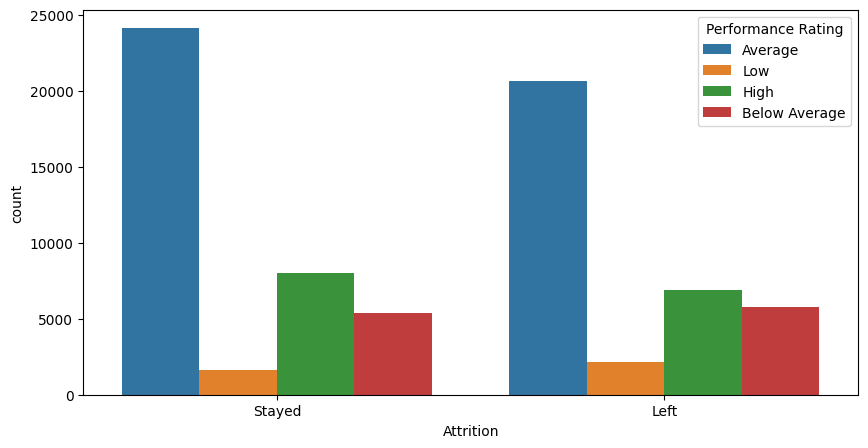

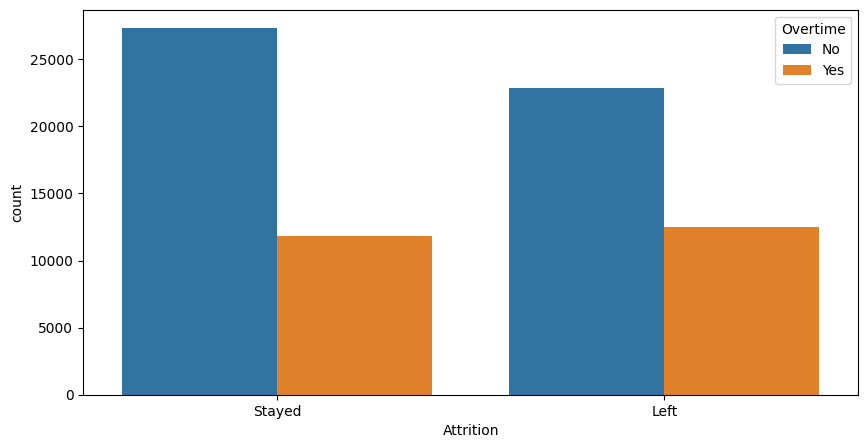

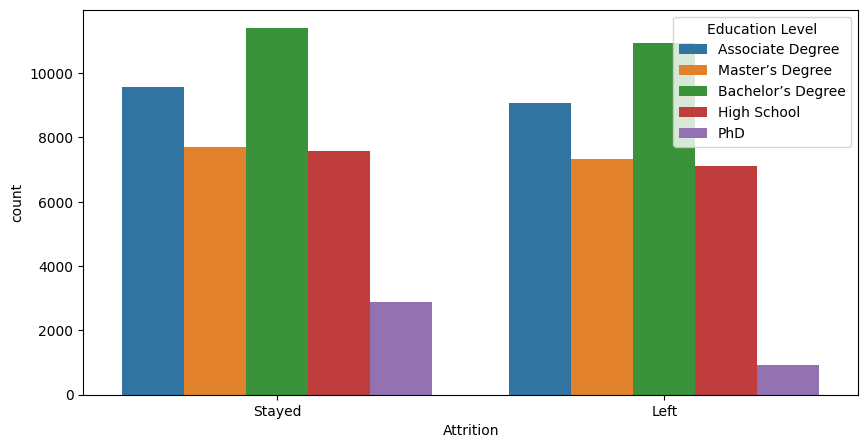

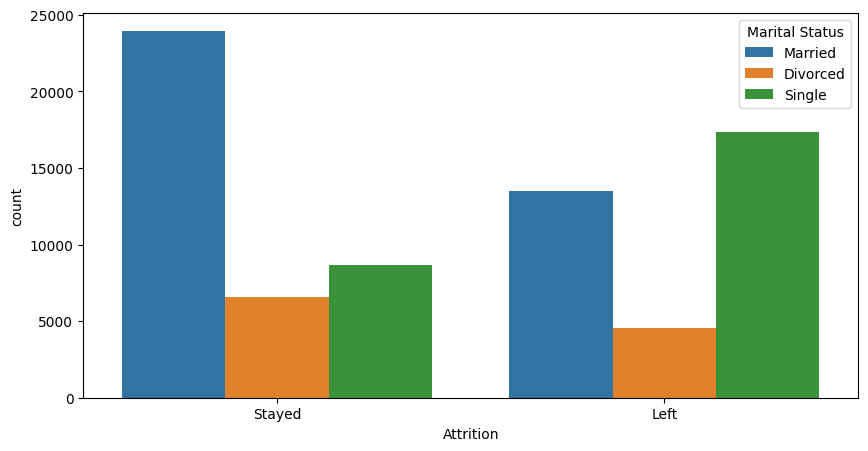

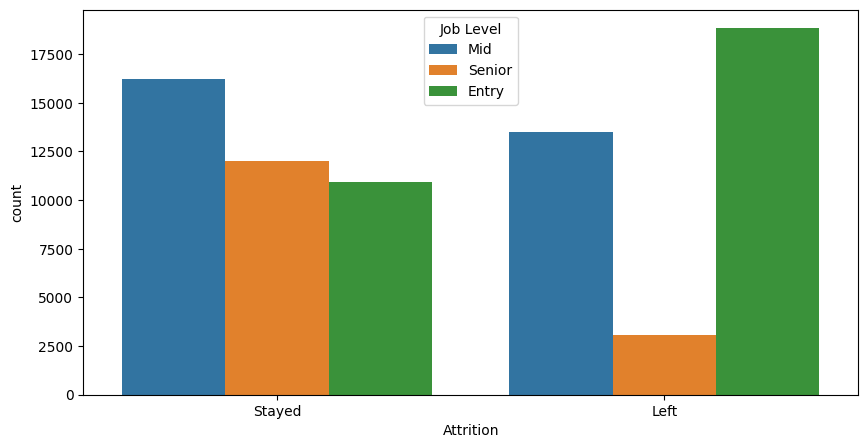

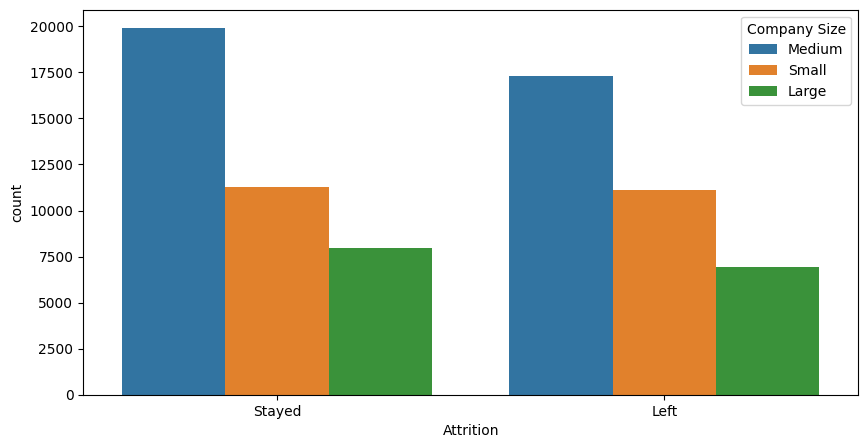

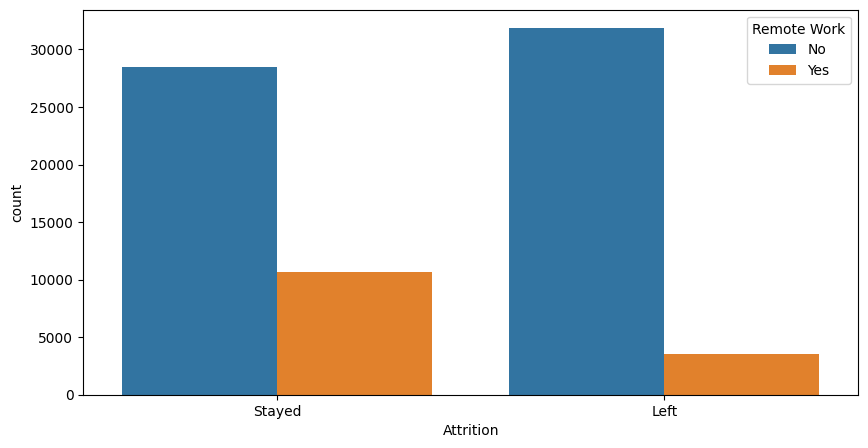

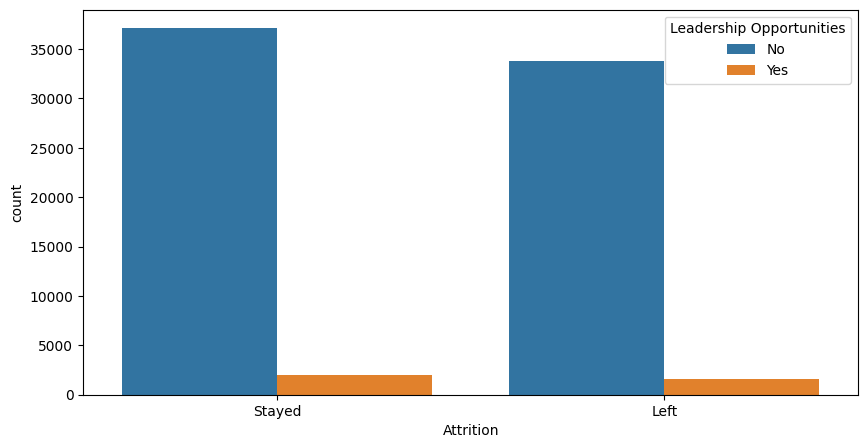

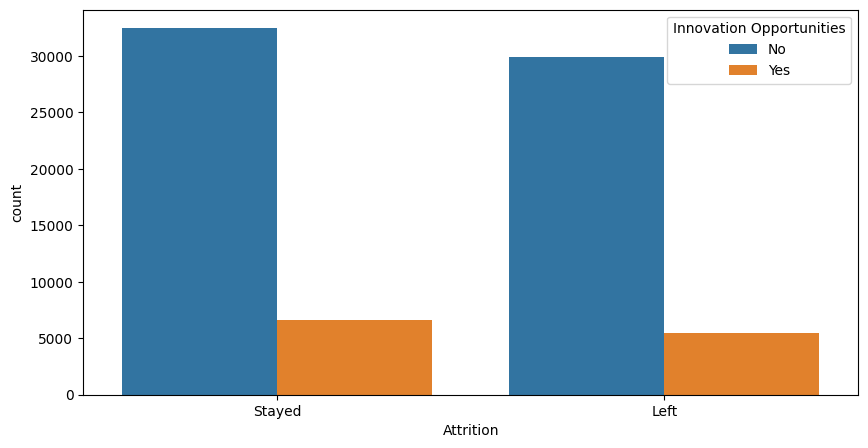

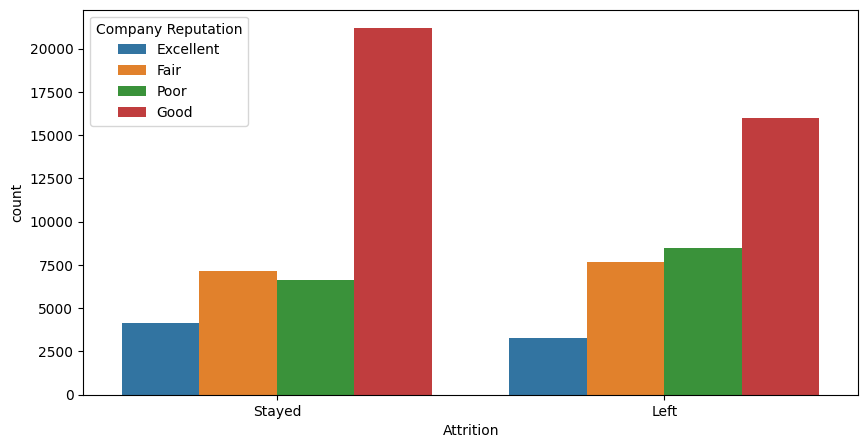

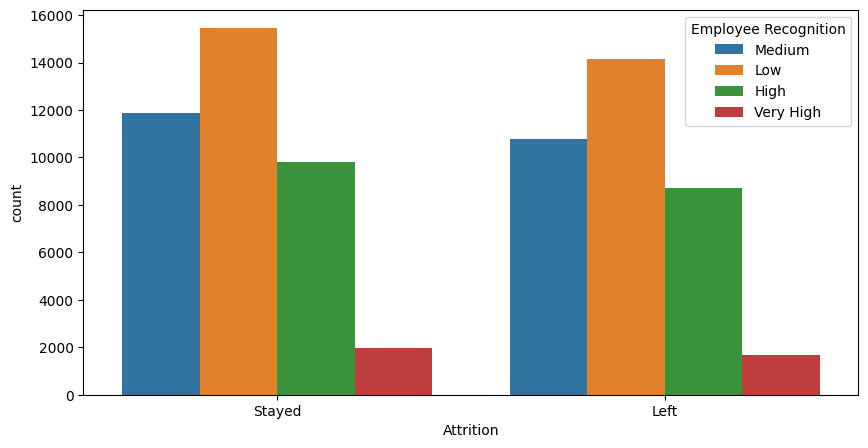

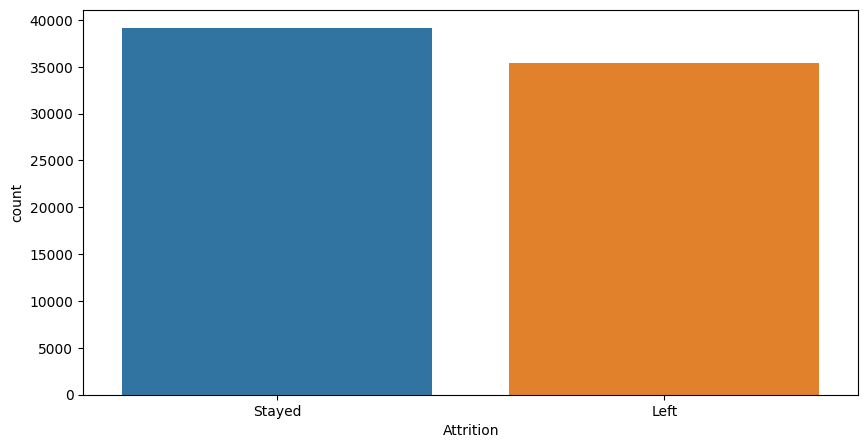

In [202]:
# Bar charts for categorical features vs attrition
categorical_columns = emp1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Attrition', hue=column, data=emp1)
    plt.show()

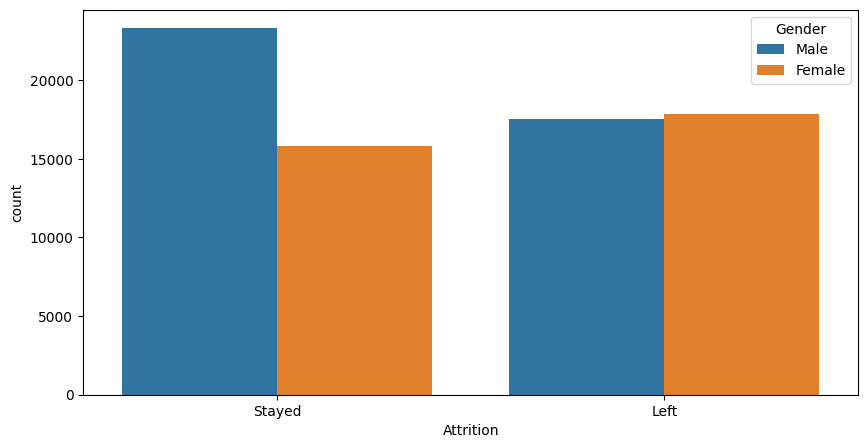

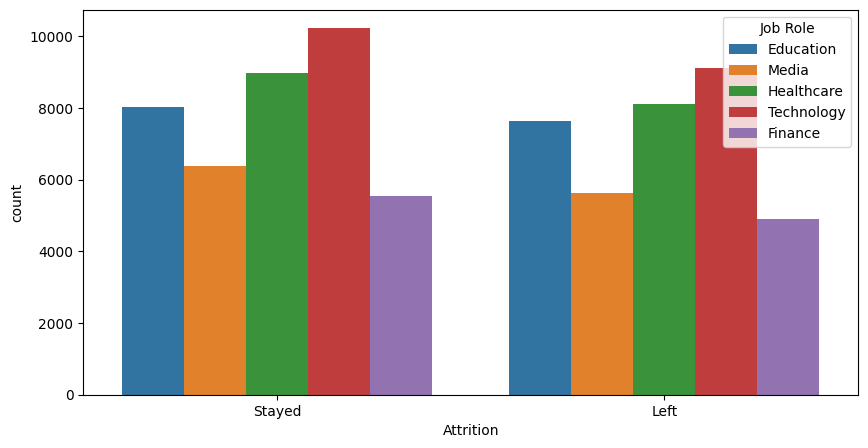

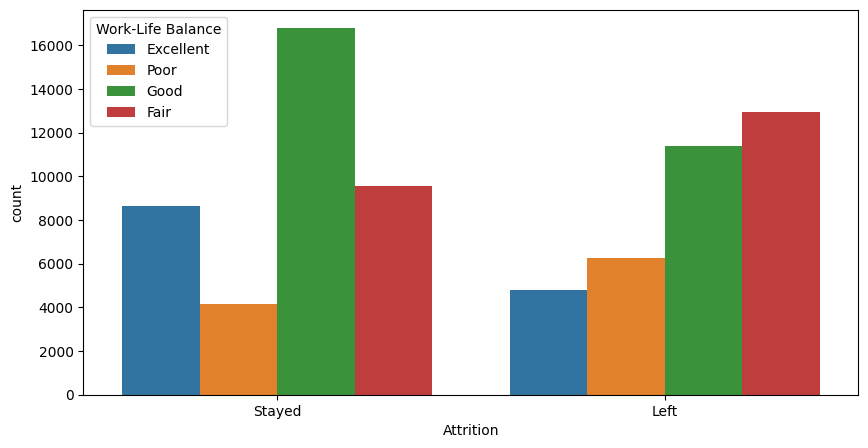

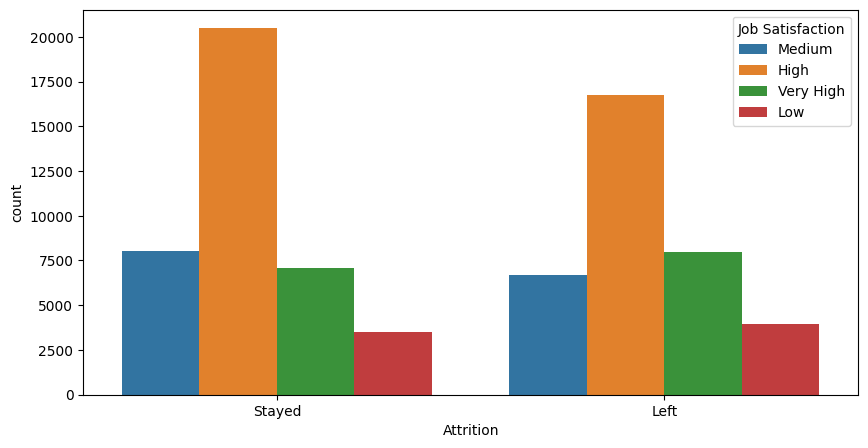

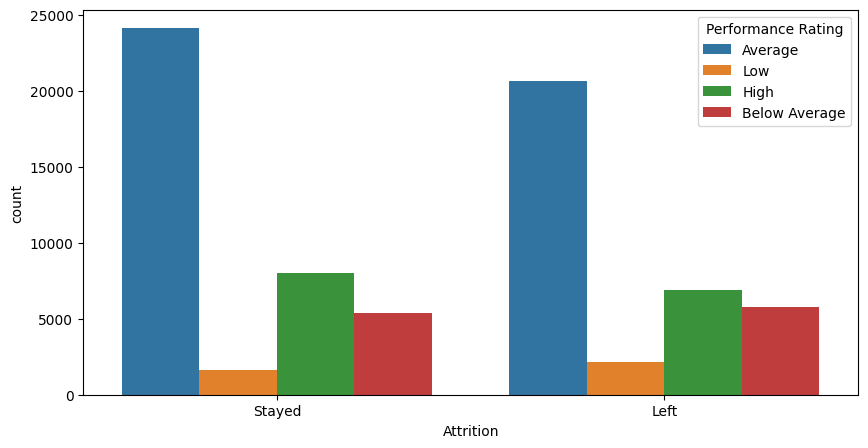

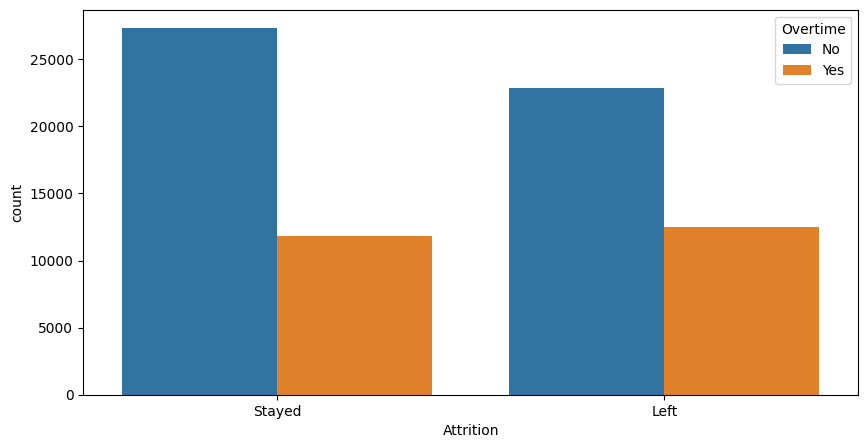

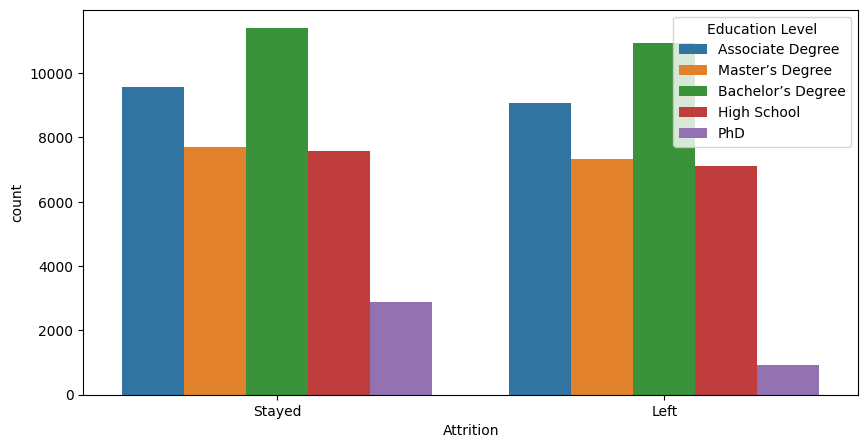

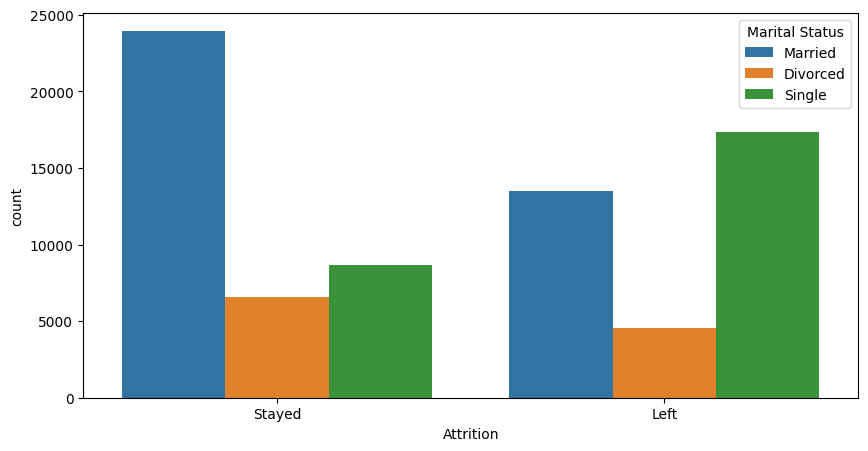

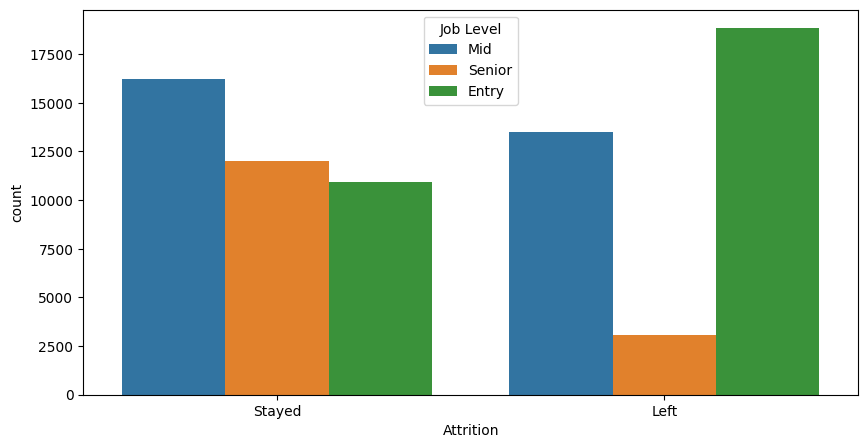

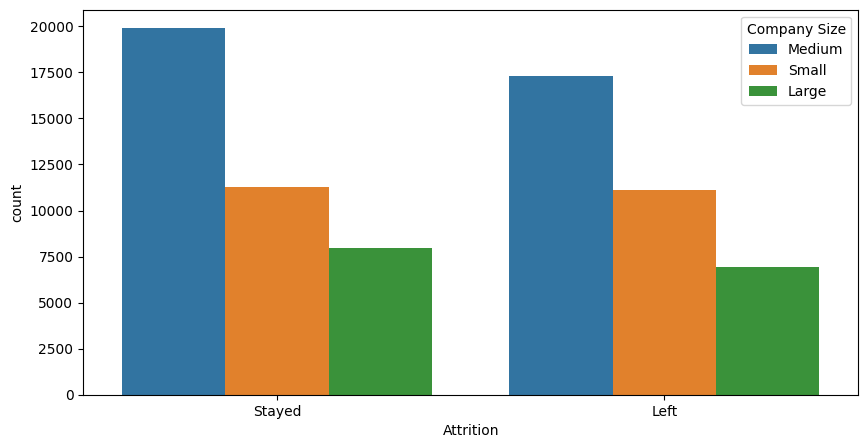

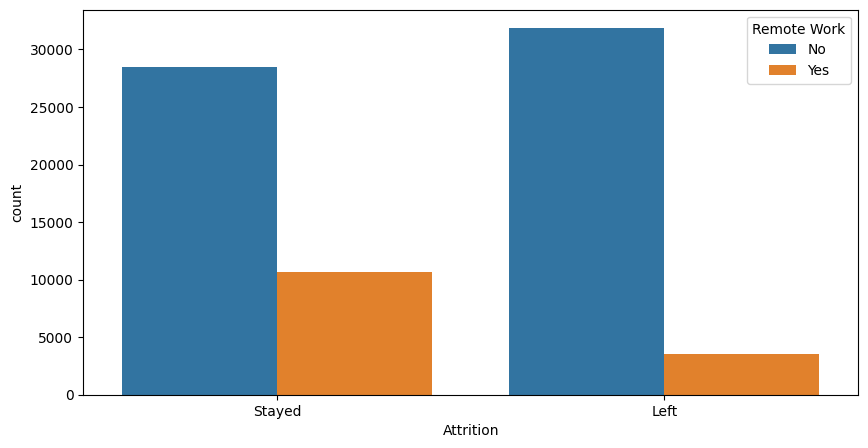

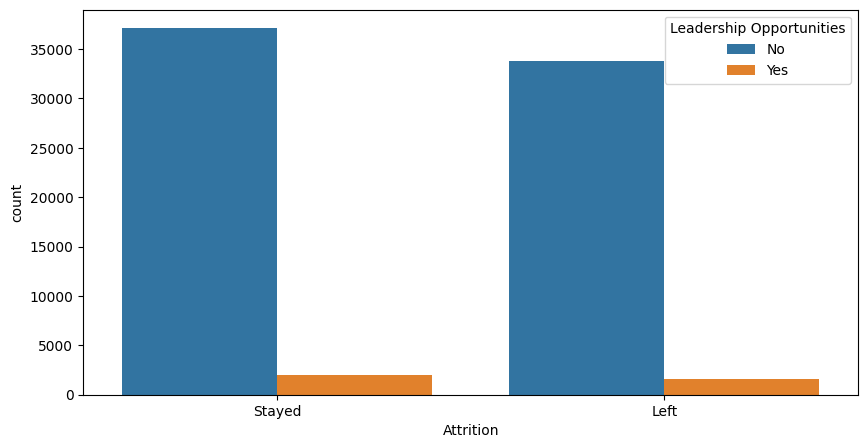

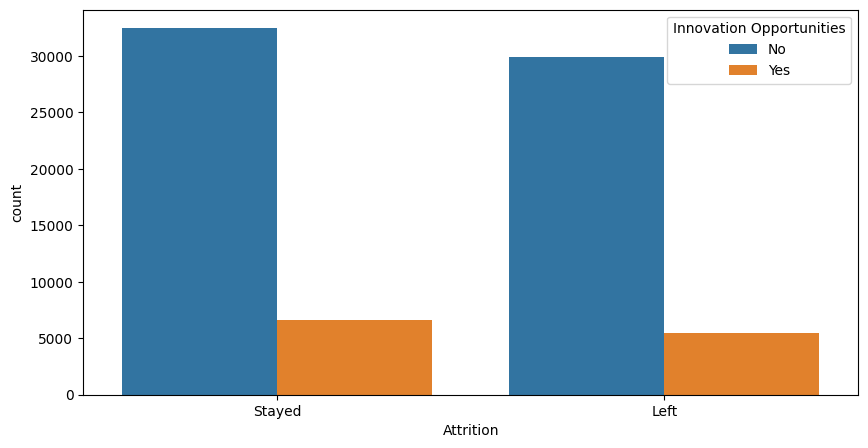

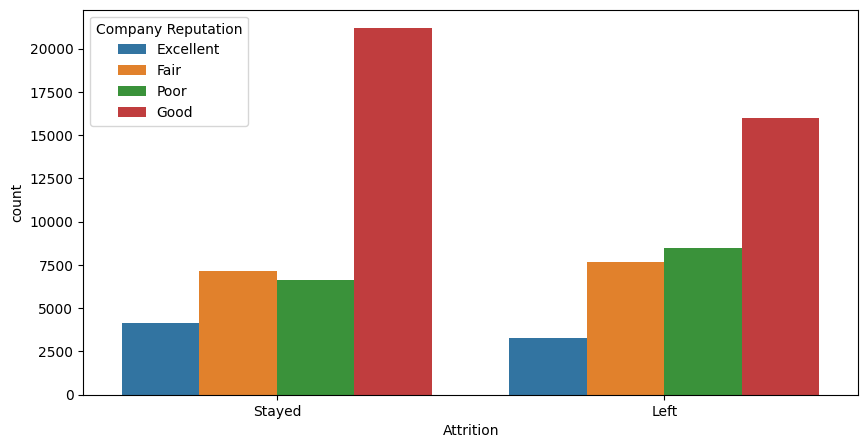

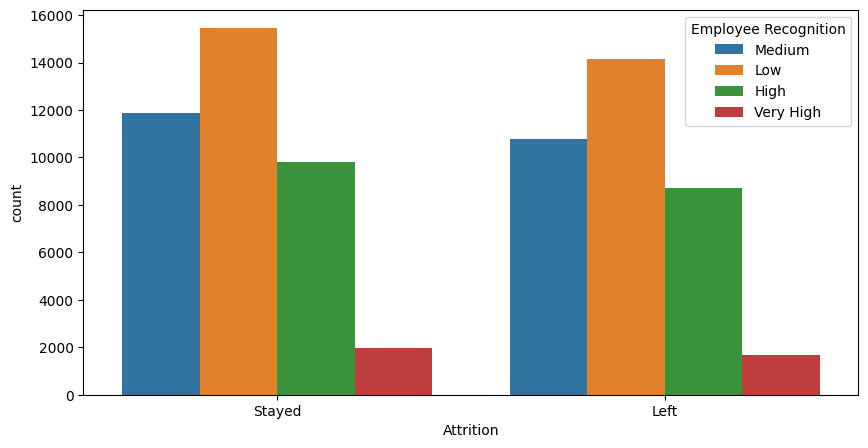

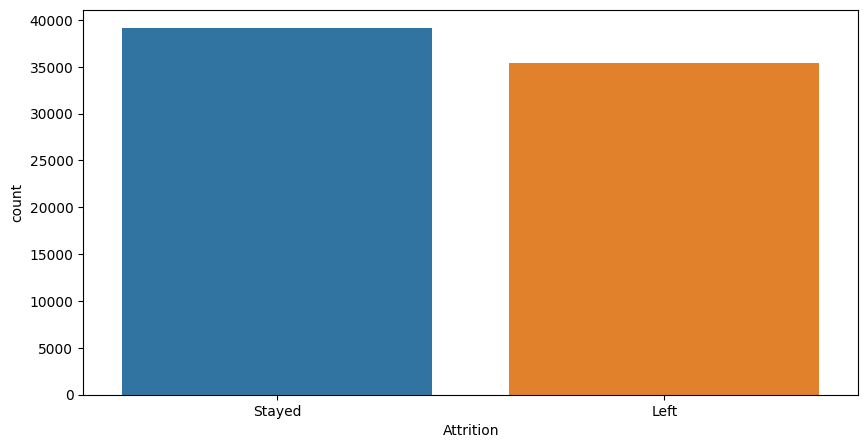

In [203]:
# Bar charts for categorical features vs attrition
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Attrition', hue=column, data=emp1)
    plt.show()

In [204]:
# Calculate attrition rate
attrition_rate = emp1['Attrition'].value_counts(normalize=True)
print(f'Attrition Rate:\n{attrition_rate}')

Attrition Rate:
Attrition
Stayed    0.525222
Left      0.474778
Name: proportion, dtype: float64


# Handling Missing Values.

In [205]:
# Looking for missing values
for col in emp1.columns:
    print('{} - missing Values: {}'.format(col, emp1[col].isnull().sum()))

Employee ID - missing Values: 0
Age - missing Values: 0
Gender - missing Values: 0
Years at Company - missing Values: 0
Job Role - missing Values: 0
Monthly Income - missing Values: 0
Work-Life Balance - missing Values: 4
Job Satisfaction - missing Values: 0
Performance Rating - missing Values: 4
Number of Promotions - missing Values: 5
Overtime - missing Values: 0
Distance from Home - missing Values: 0
Education Level - missing Values: 5
Marital Status - missing Values: 4
Number of Dependents - missing Values: 6
Job Level - missing Values: 5
Company Size - missing Values: 2
Company Tenure - missing Values: 0
Remote Work - missing Values: 3
Leadership Opportunities - missing Values: 0
Innovation Opportunities - missing Values: 0
Company Reputation - missing Values: 0
Employee Recognition - missing Values: 2
Attrition - missing Values: 0


In [206]:
emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [207]:

for columns in  numerical_columns:
  print(columns,"-",round(emp1[columns].skew(),2))

Employee ID - 0.0
Age - -0.0
Years at Company - 0.79
Monthly Income - 0.12
Number of Promotions - 0.99
Distance from Home - 0.0
Number of Dependents - 0.71
Company Tenure - 0.07


In [208]:
# Inspect missing values
print(emp1.isnull().sum())

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64


In [209]:
emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

# Missing value Imputation

MOde Imputation

In [210]:

emp1['Work-Life Balance'].fillna(emp1['Work-Life Balance'].mode()[0], inplace = True)
emp1['Work-Life Balance'].unique()

array(['Excellent', 'Poor', 'Good', 'Fair'], dtype=object)

In [211]:
emp1['Performance Rating'].fillna(emp1['Performance Rating'].mode()[0], inplace = True)
emp1['Performance Rating'].unique()

array(['Average', 'Low', 'High', 'Below Average'], dtype=object)

In [212]:
emp1['Education Level'].fillna(emp1['Education Level'].mode()[0], inplace = True)
emp1['Education Level'].unique()

array(['Associate Degree', 'Master’s Degree', 'Bachelor’s Degree',
       'High School', 'PhD'], dtype=object)

In [213]:
emp1['Job Level'].fillna(emp1['Job Level'].mode()[0], inplace = True)
emp1['Job Level'].unique()

array(['Mid', 'Senior', 'Entry'], dtype=object)

In [214]:
emp1['Job Level'].fillna(emp1['Job Level'].mode()[0], inplace = True)
emp1['Job Level'].unique()

array(['Mid', 'Senior', 'Entry'], dtype=object)

In [215]:
emp1['Employee Recognition'].fillna(emp1['Employee Recognition'].mode()[0], inplace = True)
emp1['Employee Recognition'].unique()

array(['Medium', 'Low', 'High', 'Very High'], dtype=object)

In [216]:
emp1['Remote Work'].fillna(emp1['Remote Work'].mode()[0], inplace = True)
emp1['Remote Work'].unique()

array(['No', 'Yes'], dtype=object)

In [217]:
emp1['Job Level'].fillna(emp1['Job Level'].mode()[0], inplace = True)
emp1['Job Level'].unique()

array(['Mid', 'Senior', 'Entry'], dtype=object)

Median Imputation

In [218]:
# Median imputation
col1=["Number of Dependents","Number of Dependents","Number of Promotions"]
for column in col1:
  emp1[column].fillna(emp1[column].median(), inplace = True)

# **Detecting and treating Outliers**

In [219]:
emp1.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832989,49.991584,1.650313,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995271,28.513611,1.553608,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


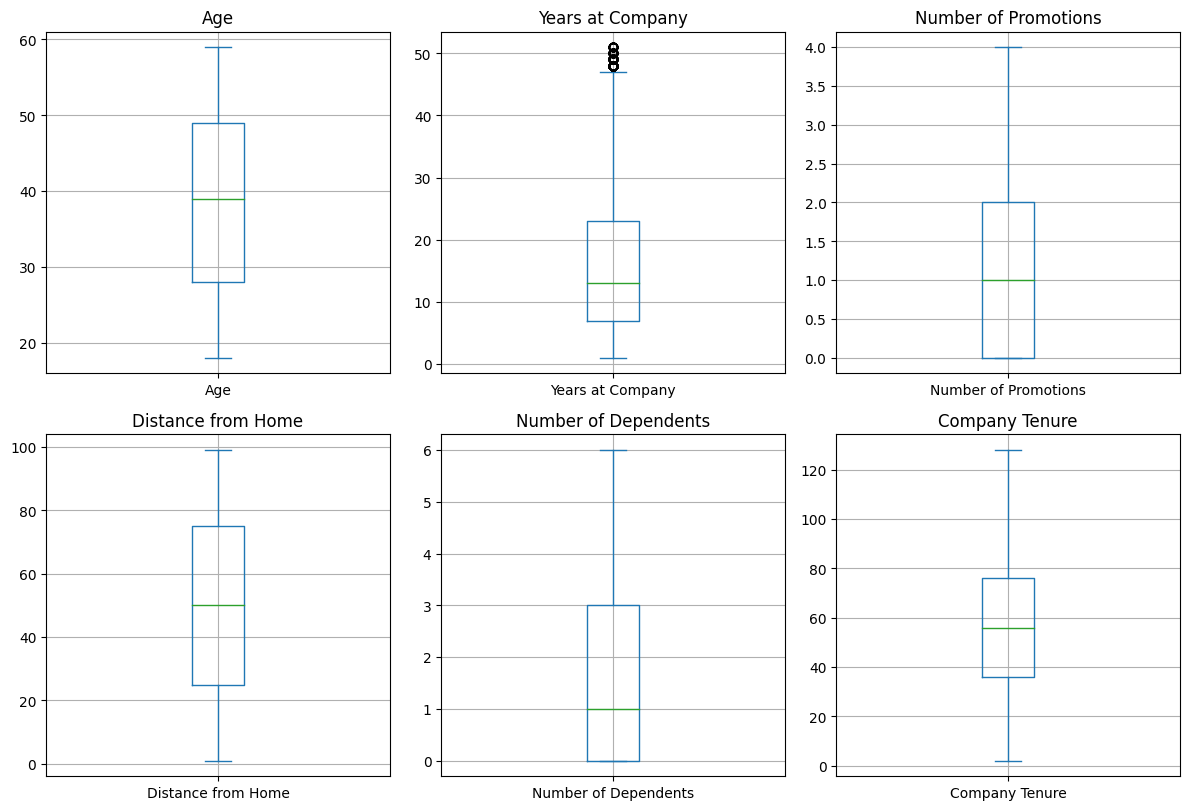

In [220]:
# Selecting continuous numeric columns

col = [ 'Age','Years at Company', 'Number of Promotions','Distance from Home','Number of Dependents', 'Company Tenure']


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(col):
    if feature in emp1.columns:
        emp1[feature].plot(kind='box', ax=axes[i], fontsize=10)
        axes[i].set_title(feature)
        axes[i].grid(True)
    else:
        axes[i].set_visible(False)  # Hide the subplot if the feature is not in the DataFrame

# Hide any unused subplots if there are fewer than 20 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Encoding.**

Label Encoding

In [221]:
# Select categorical columns
categorical_columns = emp.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [222]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_columns:
    emp1[column] = le.fit_transform(emp1[column])

In [223]:
emp1.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2.0,...,0.0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1


In [224]:
emp1.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

# **One-Hot Encoding the Selected Categorical Features.**

# **Scaling**

In [225]:
# Selected features for Model Building.
Features = ['Years at Company','Company Tenure','Tenure','Job Satisfaction','Work-Life Balance', 'Monthly Income', 'Number of Promotions']

emp1 = emp1.drop(['Employee ID', 'Gender',  'Job Role','Age',
       'Performance Rating', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'] ,axis=1)

# **Predictive Modelling**

In [226]:
from sklearn.model_selection import train_test_split

X= emp1.drop(columns=['Attrition'])
y= emp1['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

X= emp1.drop(columns=['Attrition'])
y= emp1['Attrition']

normalizer = MinMaxScaler()
X_normal = normalizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Model Selection**

In [228]:
pip install xgboost

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Run after "pip install xgboost"
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier()
}

In [230]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print('*'*30)
    print(f'{name} Classifier:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

******************************
Decision Tree Classifier:
Train Accuracy: 1.0000
Test Accuracy: 0.5291
Precision: 0.5287
Recall: 0.5291
******************************
Random Forest Classifier:
Train Accuracy: 1.0000
Test Accuracy: 0.5650
Precision: 0.5645
Recall: 0.5650
******************************
XGBoost Classifier:
Train Accuracy: 0.6743
Test Accuracy: 0.5954
Precision: 0.5945
Recall: 0.5954


# **Fine Tuning**

In [231]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4,6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'splitter': 'best'}
**************************************************
Best Accuracy Score: 61.14  %
Test Set Accuracy: 60.72  %
Precision: 60.65 %
Recall: 60.72 %
F1 Score: 60.6400 %
**************************************************
DecisionTreeClassifier(criterion='entropy', max_depth=6)
